In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
def str_list_to_set(s):
    """Convert a string representation of an int list to a set."""
    if not s or s == '[]':
        return set()
    return set(map(int, s.strip('[]').split(',')))

In [34]:
congresspeople = pd.read_csv('congress_severability.csv')
for t in range(1, 6):
    congresspeople[f'Severable Component @ t = {t}'] = congresspeople[f'Severable Component @ t = {t}'].apply(str_list_to_set)
    congresspeople[f'Severability @ t = {t}'] = congresspeople[f'Severability @ t = {t}'].apply(float)
congresspeople.head()

,username,Severable Component @ t = 1,Severability @ t = 1,Severable Component @ t = 2,Severability @ t = 2,Severable Component @ t = 3,Severability @ t = 3,Severable Component @ t = 4,Severability @ t = 4,Severable Component @ t = 5,Severability @ t = 5
0,SenatorBaldwin,"{0, 1, 2, 3, 4, 261, 6, 7, 8, 9, 10, 11, 12, 1...",0.469290,"{0, 1, 2, 3, 4, 261, 6, 7, 5, 9, 10, 139, 12, ...",0.516892,"{0, 1, 64, 6, 7, 72, 9, 10, 75, 12, 41, 14, 15...",0.490340,"{0, 1, 64, 6, 7, 72, 41, 10, 75, 12, 9, 14, 15...",0.496530,"{0, 1, 64, 2, 33, 66, 6, 106, 75, 12, 14, 207,...",0.497355
1,SenJohnBarrasso,"{0, 1, 2, 3, 4, 261, 6, 7, 8, 9, 10, 11, 12, 1...",0.469901,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 261, 10, 12, 13...",0.523837,"{0, 1, 64, 6, 7, 39, 9, 10, 75, 12, 14, 15, 11...",0.490286,"{0, 1, 64, 6, 7, 72, 41, 9, 75, 12, 10, 14, 15...",0.496530,"{0, 1, 261, 6, 7, 9, 138, 10, 12, 14, 15, 24, ...",0.498616
2,SenatorBennet,"{2, 59, 50, 30}",0.518889,"{2, 5, 389, 266, 30, 168, 427, 172, 50, 439, 5...",0.490862,"{2, 386, 4, 3, 226, 187, 303, 112, 50, 222, 37...",0.479445,"{2, 386, 4, 3, 141, 17, 404, 30, 303, 50, 59, ...",0.486457,"{2, 386, 3, 391, 8, 270, 404, 282, 30, 286, 16...",0.491279
3,MarshaBlackburn,"{66, 3, 70}",0.521003,"{0, 1, 2, 3, 4, 261, 6, 7, 8, 9, 10, 11, 139, ...",0.517417,"{66, 3, 387, 70, 8, 105, 362, 363, 110, 245, 2...",0.468132,"{66, 3, 387, 226, 70, 8, 105, 362, 363, 108, 1...",0.481655,"{3, 387, 8, 269, 19, 277, 28, 172, 440, 441, 6...",0.487953
4,SenBlumenthal,"{4, 72, 9, 74, 25, 125}",0.452261,"{0, 1, 2, 3, 4, 261, 6, 7, 8, 9, 10, 139, 12, ...",0.523837,"{0, 1, 2, 3, 4, 261, 6, 7, 5, 9, 10, 8, 12, 13...",0.510462,"{1, 4, 7, 9, 10, 15, 20, 24, 41, 170, 43, 47, ...",0.493798,"{4, 7, 9, 10, 15, 402, 20, 21, 24, 155, 291, 1...",0.497080


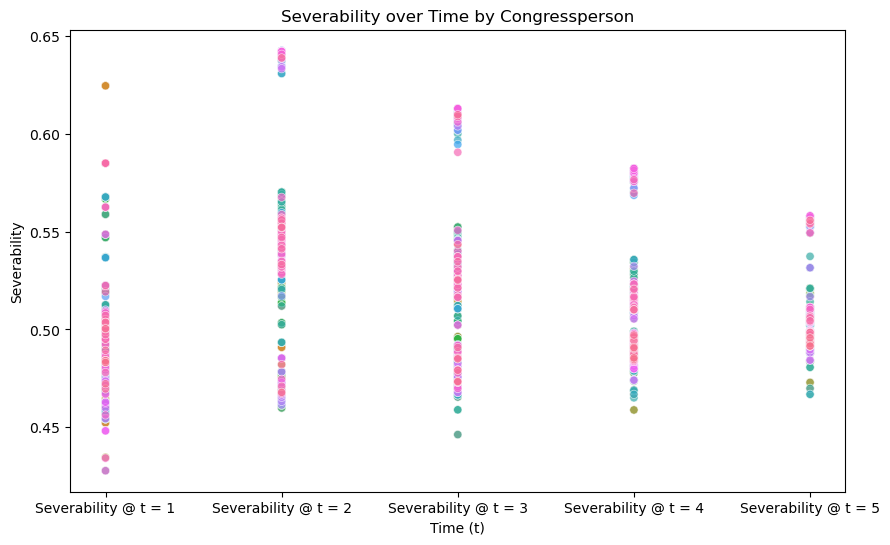

In [35]:
# Melt the DataFrame to long format for plotting
severability_long = congresspeople.melt(
    id_vars=['username'], 
    value_vars=[f'Severability @ t = {i}' for i in range(1, 6)],
    var_name='Time', 
    value_name='Severability'
)

severability_long.replace(0, np.nan, inplace=True)  # Replace 0 with NaN for better visualization

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=severability_long, 
    x='Time', 
    y='Severability',
    hue='username', 
    legend=False,  # Hide legend if too many lines
    alpha=0.7
)
plt.title('Severability over Time by Congressperson')
plt.xlabel('Time (t)')
plt.ylabel('Severability')
plt.show()

In [ ]:
def jaccard(set1, set2):
    """Calculate the Jaccard similarity between two sets."""
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union > 0 else 0

n = congresspeople.shape[0]
jac_congress = np.zeros((n, n, 5))
for i in range(n):
    for j in range(n):
        for t in range(1, 6):
            set1 = congresspeople.loc[i, f'Severable Component @ t = {t}']
            set2 = congresspeople.loc[j, f'Severable Component @ t = {t}']
            jac_congress[i, j, t - 1] = jaccard(set1, set2)

jac_congress = np.apply_along_axis(np.nanmean, 2, jac_congress)
jac_congress

array([[1.        , 0.73989817, 0.01780652, ..., 0.00322581, 0.        ,
        0.01324421],
       [0.73989817, 1.        , 0.01024155, ..., 0.00363636, 0.        ,
        0.01688057],
       [0.01780652, 0.01024155, 1.        , ..., 0.        , 0.        ,
        0.00798535],
       ...,
       [0.00322581, 0.00363636, 0.        , ..., 0.8       , 0.        ,
        0.00851064],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01324421, 0.01688057, 0.00798535, ..., 0.00851064, 0.        ,
        0.8       ]])

In [ ]:
np.fill_diagonal(jac_congress, np.nan)  # Fill diagonal with NaN to avoid self-comparison
average_jaccard_mean = np.nanmean(jac_congress, axis=0)
username_to_average_jaccard_mean = {username: average_jaccard_mean[i] for i, username in enumerate(congresspeople['username'])}
sorted_average_jaccard_mean = sorted(username_to_average_jaccard_mean.items(), key=lambda x: x[1], reverse=True)

# Display the average Jaccard similarity for each congressperson
print("Average Jaccard Similarity for each Congressperson, with other Congresspeople:")
for username, avg_jaccard in sorted_average_jaccard_mean:
    print(f"{username}: {avg_jaccard:.4f}")

Average Jaccard Similarity for each Congressperson, with other Congresspeople:
RepCindyAxne: 0.1335
RepKathleenRice: 0.1335
RepArrington: 0.1335
RepBrianBabin: 0.1335
RepJimBanks: 0.1335
RepRoKhanna: 0.1335
CongressmanRaja: 0.1335
RepAnnieKuster: 0.1335
RepNancyMace: 0.1335
RepTerriSewell: 0.1335
RepSlotkin: 0.1335
RepGregMurphy: 0.1332
RepAuchincloss: 0.1327
RepMariaSalazar: 0.1326
RepMalliotakis: 0.1326
CongMikeSimpson: 0.1326
RepDonBacon: 0.1322
RepJeffries: 0.1321
RepMcCaul: 0.1320
RepFranklin: 0.1315
RepSarbanes: 0.1311
USRepKeating: 0.1311
RepSherrill: 0.1311
RepLucyMcBath: 0.1309
RepJoeNeguse: 0.1309
RepBlakeMoore: 0.1308
RepAndyBiggsAZ: 0.1307
RepTomRice: 0.1307
RepHuffman: 0.1306
RepElaineLuria: 0.1304
RepBrianMast: 0.1296
RepSteel: 0.1293
RepHartzler: 0.1284
SenTomCotton: 0.1282
RepFrankLucas: 0.1276
SenatorWarnock: 0.1275
RepRaulRuizMD: 0.1266
RepKManning: 0.1263
RepMattGaetz: 0.1255
RepKayGranger: 0.1252
SenMikeLee: 0.1241
DorisMatsui: 0.1235
RepMaloney: 0.1235
SenThomTilli

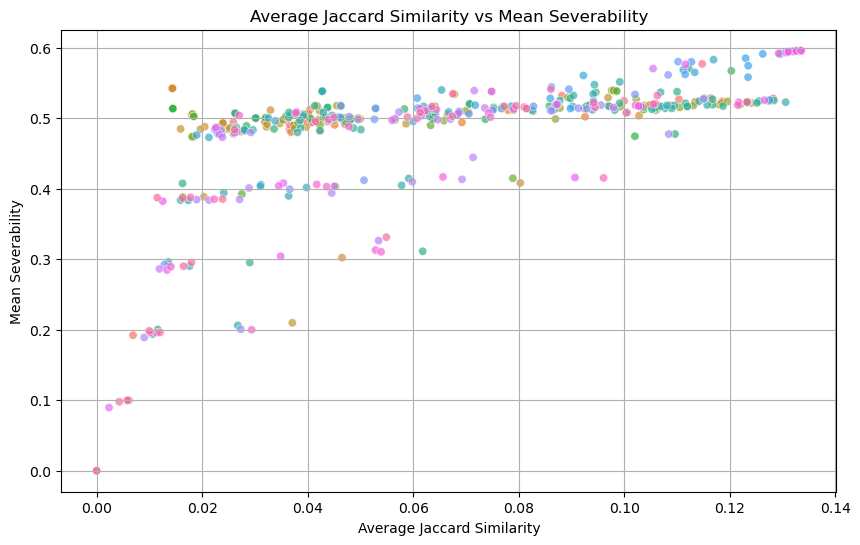

In [74]:
mean_severability = congresspeople[[f'Severability @ t = {i}' for i in range(1, 6)]].mean(axis=1)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=average_jaccard_mean,
    y=mean_severability,
    hue=congresspeople['username'],
    legend=None,
    alpha=0.7,
    marker='o',
)
plt.title('Average Jaccard Similarity vs Mean Severability')
plt.xlabel('Average Jaccard Similarity')
plt.ylabel('Mean Severability')
plt.grid(True)
plt.show()

In [ ]:
occurences = np.zeros(congresspeople.shape[0], dtype=int)
for t in range(1, 6):
    for comp in congresspeople[f'Severable Component @ t = {t}']:
        sizes += len(comp)
        for i in comp:
            occurences[i] += 1

username_to_occurences = dict(zip(congresspeople['username'], occurences))
# Sort the occurences dictionary by values
sorted_occurences = sorted(username_to_occurences.items(), key=lambda x: x[1], reverse=True)
print("Most Occurrences of Severable Components by Congressperson:")
for username, count in sorted_occurences:
    print(f"{username}: {count} occurrences")

31.280421052631578
Most Occurrences of Severable Components by Congressperson:
RepMondaire: 666 occurrences
RepBourdeaux: 646 occurrences
RepAuchincloss: 638 occurrences
RepMalinowski: 613 occurrences
RepBarbaraLee: 592 occurrences
RepSeanMaloney: 572 occurrences
RepGallagher: 554 occurrences
BettyMcCollum04: 548 occurrences
SenWhitehouse: 545 occurrences
SenKevinCramer: 537 occurrences
DorisMatsui: 526 occurrences
RepAnthonyBrown: 519 occurrences
RepStricklandWA: 516 occurrences
SenLummis: 512 occurrences
RepAndyLevin: 509 occurrences
RepKenBuck: 507 occurrences
SenThomTillis: 506 occurrences
RepSylviaGarcia: 497 occurrences
SenCortezMasto: 492 occurrences
GOPLeader: 491 occurrences
RepDeSaulnier: 488 occurrences
repdelgado: 485 occurrences
RepBrianMast: 485 occurrences
SenatorHagerty: 481 occurrences
CongBoyle: 480 occurrences
SenDanSullivan: 475 occurrences
SenatorWarnock: 470 occurrences
RepJeffries: 470 occurrences
RepGregMurphy: 466 occurrences
RepFeenstra: 465 occurrences
Rep_Cl